# Pyber Ride Sharing
----

### Analysis
* Roughly 70% of all rides and total fare value come from Urban riders.
* Rural riders tend to take significantly higher cost, albeit fewer, trips than Urban or Suburban riders.
* While comprising of roughly 37% of all rides and fares, Suburban and Rural cities afford only 14% of Pyber's total driver population. 

In [1]:
# Import dependencies for calculations and charting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from statistics import mean, median, mode
import seaborn as sns

In [2]:
#Import two data CSV files 
city_data = pd.read_csv("./raw_data/city_data.csv", low_memory = False)
ride_data = pd.read_csv("./raw_data/ride_data.csv", low_memory = False)

In [3]:
#Dropping duplicates in the city csv file
city_data_df = city_data.groupby(['city', 'type']).sum()

#Resetting index before merging datagroups
city_data_df = city_data_df.reset_index()
city_data_df.head()

,city,type,driver_count
0,Alvarezhaven,Urban,21
1,Alyssaberg,Urban,67
2,Anitamouth,Suburban,16
3,Antoniomouth,Urban,21
4,Aprilchester,Urban,49


In [4]:
# Merge the files on common column: city 
pyber_df = pd.merge(city_data_df, ride_data, how = 'inner', on = 'city')
pyber_df.head()

,city,type,driver_count,date,fare,ride_id
0,Alvarezhaven,Urban,21,2016-04-18 20:51:29,31.93,4267015736324
1,Alvarezhaven,Urban,21,2016-08-01 00:39:48,6.42,8394540350728
2,Alvarezhaven,Urban,21,2016-09-01 22:57:12,18.09,1197329964911
3,Alvarezhaven,Urban,21,2016-08-18 07:12:06,20.74,357421158941
4,Alvarezhaven,Urban,21,2016-04-04 23:45:50,14.25,6431434271355


In [5]:
# Calculate Average Fare ($) Per City and resetting the index
   # group by city, find the average of the fare column

# average_fare = city_group['fare'].mean()
average_fare = ride_data.groupby("city").mean()

#Reset the index and drop irrelevant information
average_fare = average_fare.reset_index()
average_fare = average_fare.drop(['ride_id'], axis=1)

#Rename the columns
average_fare = average_fare.rename(columns = {'city': 'City'})
average_fare = average_fare.rename(columns = {'fare': 'Average Fare'})

#Print top outcomes
average_fare =round(average_fare,2)
average_fare.head()

,City,Average Fare
0,Alvarezhaven,23.93
1,Alyssaberg,20.61
2,Anitamouth,37.32
3,Antoniomouth,23.62
4,Aprilchester,21.98


In [6]:
#Calculate Total Number of Rides Per City

total_rides_df = ride_data.groupby("city").count()
total_rides = total_rides_df['ride_id']

#Reset the index 
total_rides = total_rides.reset_index()

#Rename the columns
total_rides = total_rides.rename(columns = {'city': 'City'})
total_rides = total_rides.rename(columns = {'ride_id': 'Total Number of Rides'})

#Print top outcomes
total_rides.head()

,City,Total Number of Rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [7]:
# Calculate Total Number of Drivers Per City
total_drivers =  city_data.groupby("city").sum()

#Reset the index 
total_drivers = total_drivers.reset_index()

#Rename the columns
total_drivers = total_drivers.rename(columns = {'city': 'City'})
total_drivers = total_drivers.rename(columns = {'type': 'City Type'})
total_drivers = total_drivers.rename(columns = {'driver_count': 'Total Number of Drivers'})

#Print top outcomes
total_drivers.head()

,City,Total Number of Drivers
0,Alvarezhaven,21
1,Alyssaberg,67
2,Anitamouth,16
3,Antoniomouth,21
4,Aprilchester,49


In [8]:
#Combine city type and total number of drivers
combined_df = city_data_df.rename(columns={'driver_count': 'Total Number of Drivers', 
                                           'type':         'City Type',
                                           'city':         'City'})
combined_df.head()

,City,City Type,Total Number of Drivers
0,Alvarezhaven,Urban,21
1,Alyssaberg,Urban,67
2,Anitamouth,Suburban,16
3,Antoniomouth,Urban,21
4,Aprilchester,Urban,49


In [9]:
# Set up bubble plot data and create DataFrame with above information 
bubble_plot = pd.merge(average_fare, pd.merge(total_rides, combined_df, on = 'City'), on = 'City')
bubble_plot['Total Fare per City'] = bubble_plot['Average Fare'] * bubble_plot['Total Number of Rides']

#Print top outcomes
bubble_plot.head()

,City,Average Fare,Total Number of Rides,City Type,Total Number of Drivers,Total Fare per City
0,Alvarezhaven,23.93,31,Urban,21,741.83
1,Alyssaberg,20.61,26,Urban,67,535.86
2,Anitamouth,37.32,9,Suburban,16,335.88
3,Antoniomouth,23.62,22,Urban,21,519.64
4,Aprilchester,21.98,19,Urban,49,417.62


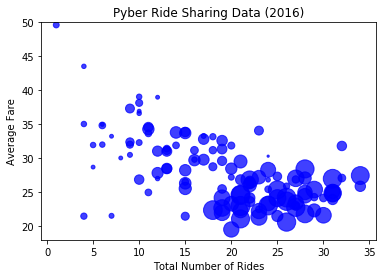

In [10]:
#Begin creating bubble plot - scatter plot testing with data and defining paramters of the bubble plot
bubble_plot.plot(kind='scatter', 
                 x = 'Total Number of Rides', 
                 y = 'Average Fare',
                 c = 'b', 
                 s = bubble_plot['Total Number of Drivers']*5, 
                 title = 'Pyber Ride Sharing Data (2016)', ylim = (18,50), alpha = 0.75)

plt.show()

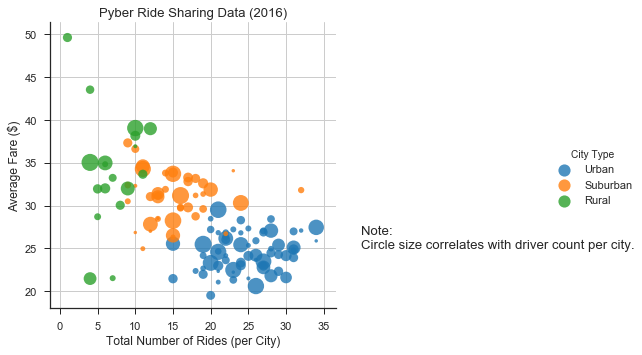

In [11]:
# Create bubble plot with above data
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create bubbleplot of dataframe with Seaborn library
sns.lmplot('Total Number of Rides', 
           'Average Fare', 
           data = bubble_plot,
           fit_reg = False, 
           hue = "City Type", 
           scatter_kws = {"marker": "D", 
                          "s": bubble_plot['Total Number of Drivers'] *4 }) 


# Incorporate a text label regarding circle size
plt.text(40, 25, "Note:\nCircle size correlates with driver count per city.")

# Set title and axes labels
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.show()

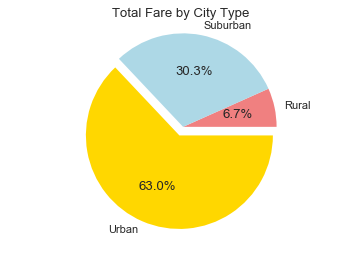

In [14]:
# Pie Chart % of Total Fares by City Type
total_fare = pyber_df.groupby("type")["fare"].sum()
plt.title("Total Fare by City Type")
plt.pie(total_fare, labels = ["Rural","Suburban","Urban"], 
        colors = ["lightcoral", "lightblue", "gold"], 
        explode = (0,0,.1), autopct="%.1f%%")
plt.axis("equal")
plt.show()

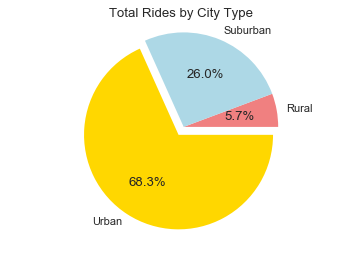

In [15]:
# Pie Chart % of Total Rides by City Type
total_rides = pyber_df.groupby("type")["ride_id"].sum()
plt.title("Total Rides by City Type")
plt.pie(total_rides, labels = ["Rural","Suburban","Urban"], 
        colors = ["lightcoral", "lightblue", "gold"], 
        explode = (0,0,0.1), autopct="%.1f%%")
plt.axis("equal")
plt.show()

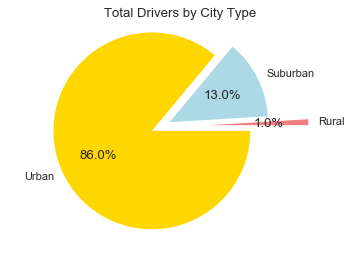

In [16]:
# Pie Chart% of Total Drivers by City Type

total_drivers = pyber_df.groupby("type")["driver_count"].sum()
plt.title("Total Drivers by City Type")
plt.pie(total_drivers, labels = ["Rural","Suburban","Urban"], 
        colors = ["lightcoral", "lightblue", "gold"], 
        explode = (0.5,0.1,0.1), autopct="%.1f%%")
plt.axis("equal")
plt.show()